# Media Mix Modeling for B2B Acquisition: Model Evaluation - v1

1. Pooling Type: ***No***
2. Normalization: 
 - target_norm_method=2 --> ***per dma across target normalization***
 - media_norm_method=2 --> ***per dma across media normalization***

## 1. Use Pre-Processed Media Mix Data

In [1]:
### 0. Load Required Packages and Utility Functions
defaultW = getOption("warn") 
options(warn = -1) 
options(scipen = 10000)
suppressPackageStartupMessages({
    library(rstan)
    options(mc.cores = parallel::detectCores())
    rstan_options(auto_write = TRUE)
    Sys.setenv(LOCAL_CPPFLAGS = '-march=native')

    library(brms)
    library(lme4)
    library(here)
    library(tidyverse)
    library(tidybayes)
    library(bayesplot)
    library(lubridate)
    library(zoo)
})

source("Packages/Utility_Functions_MMM.R")



### 1. Use Pre-Processed Media Mix Data
load("RData/data_XyZ_v1.RData")


load("RData/pp_MMM_email_cntrl.RData")

## 2. Create Stan Data

In [2]:
### 2. Create Stan Data
#------------------------------------------------------------#
# Target:              True Gross Adds                       #
# Media Normalization: across dma per media normalization    #
#------------------------------------------------------------#
var_target      = 'gross_add'
var_control     = c('seasonality_gross_add','MA_4', 'product_price','comp_index','weather1')
var_control2    = c('seasonality_gross_add','MA_4', 'trend_gross_add','product_price','comp_index','weather1')
var_control3    = c('seasonality_gross_add','MA_4','price_ARPU_fprint','comp_index','weather1')
var_control4    = c('seasonality_gross_add','MA_4','price_hybrid','comp_index','weather1')
var_control5    = c('seasonality_gross_add','MA_4','price_hybrid','comp_index','weather1','promotion')
var_control6    = c('seasonality_gross_add','MA_4','price_ARPU_fprint','comp_index','weather1','promotion')
var_control7    = c('seasonality_gross_add','MA_4','price_ARPU_fprint','comp_index','weather1','promotion','mega_holiday','covid_daily_deaths')
var_control10   = c('seasonality_gross_add','MA_4','price_ARPU_fprint','comp_index','weather1','promotion','mega_holiday','covid_daily_deaths','AR2','AR4','SNOW','covid_dummy')
var_control11   = c('seasonality_gross_add','MA_4','price_ARPU_fprint','comp_index','weather1','weather5','promotion','mega_holiday','covid_daily_deaths','AR2','AR4','SNOW','covid_dummy')
var_control12   = c('seasonality_gross_add','MA_4','price_ARPU_fprint','comp_index','weather1','weather5','promotion','mega_holiday','covid_daily_deaths','AR2','AR4','SNOW','covid_dummy','email_sent_w')

# Print media variables
print_media_names(pp_MMM_ls = pp_MMM_email_cntrl)



#------------------------------------------------------------#
# Partial Pooling                                            #
#------------------------------------------------------------#
# One can choose one of ("partial", "no", "complete") pooling types.
pooling_type   = "no"

# Choose the beginning of test date.
test_date      = NULL      

# Specify prior values for media parameters
# Provide (1) median/mean and (2) standard deviation of each of the media parameters
media_priors_00   = list(median = rep(0, 7), std = rep(1, 7))
media_priors_10   = list(median = rep(0.10, 8), std = rep(1, 8))
media_priors_20   = list(median = rep(0.20, 8), std = rep(1, 8))
media_priors_30   = list(median = rep(0.30, 8), std = rep(1, 8))







Note: Selected Media Mix Variables for Modeling
[1] "digital_spend"     "DRTV_spend_w"      "radio_spend_w"    
[4] "social_spend"      "dm_spend"          "paid_search_spend"
[7] "cross_channel_imp"


In [3]:
### Create stan_data from `make_stan_data_MMM` for all NP norm.
stan_data_NP_22_00_C12      = make_stan_data_MMM(pp_MMM_ls          = pp_MMM_email_cntrl,
                                       target_norm_method = 2,
                                       media_norm_method  = 2,
                                       var_target         = var_target,
                                       var_control        = var_control12,
                                       df_geo             = NULL,
                                       test_date          = test_date,
                                       pooling_type       = pooling_type,
                                       media_priors       = media_priors_00)


Note: How to Make Stan Data
1. Use Preprocessed Media Mix Data
 - Media mix data should be preprocessed by `preprocess_MMM()`.

2. Choose a Target Normalization Method
 - target_norm_method=2 --> per dma across target normalization

3. Choose a Media Normalization Method
 - media_norm_method=2 --> per dma across media normalization

4. Create Train/Test Data
 - The entire data will be used for model calibration as follows:

|Sample_Type | Sample_Size| Sample_Pct| N_Period|First_Date |Last_Date  |
|:-----------|-----------:|----------:|--------:|:----------|:----------|
|All         |        5850|        100|      195|2017-12-31 |2021-09-19 |
|Train       |        5850|        100|      195|2017-12-31 |2021-09-19 |
|Test        |           0|          0|        0|NA         |NA         |

5. Specify Priors for Media Parameters
 - The user-defined priors will be used as follows:

|Media_Mix         |Pooling_Type |Distribution |    Median|      Mean| Mode| STD|
|:-----------------|:-----

## 3. Diagnose MCMC

In [4]:
#################################################################################
### 4. Model Evaluation                                                       ###
###                                                                           ###
### (1) Use `diagnose_MCMC`.                                                  ###
### (2) Use `evaluate_MMM`.                                                   ###
###                                                                           ###
#################################################################################
# load("RData/stan_fit_CP.RData")


load("model_fits/fit_NP_22_00_C12_v2.RData")


### 1. Diagnose the Stan Fit
#------------------------------------------------------------#
# MCMC Conditions                                            #
#------------------------------------------------------------#
num_chains     = 4
num_iterations = 2000
num_warmups    = 1000
num_treedepth  = 15
stanfit_22_00_C12        = fit_NP_22_00_C12_v2



DIA_NP_22_00_C12   = diagnose_MCMC(var_target    = var_target,
                         stanfit       = stanfit_22_00_C12,
                         chains        = num_chains,
                         iter          = num_iterations,
                         warmup        = num_warmups,
                         max_treedepth = num_treedepth)







MCMC Diagnostics
------------------------------------------------------------
0. Target: gross_add 

1. Divergence
 - The total number of iterations: 4,000 
 - Iterations with divergences   : 0 
 - Divergence %                  : 0.00% 



`summarise()` has grouped output by 'warmup_period'. You can override using the `.groups` argument.



2. Treedepth
 - The total number of iterations: 4,000 
 - Iterations with max treedepth : 0 
 - Max treedepth %               : 0.00% 

3. n_eff, Effective Sample Size
 - The number of model parameters: 6,532 
 - The evaluation criterion      : n_eff > 1% of iterations
 - Parameters with the problem   : 0 
 - Small n_eff parameter %       : 0.00% 

4. Rhat, Potential Scale Reduction Factor
 - The number of model parameters: 6,532 
 - The evaluation criterion      : Rhat < 1.05
 - Parameters with the problem   : 0 
 - Poor mixing parameter %       : 0.00% 



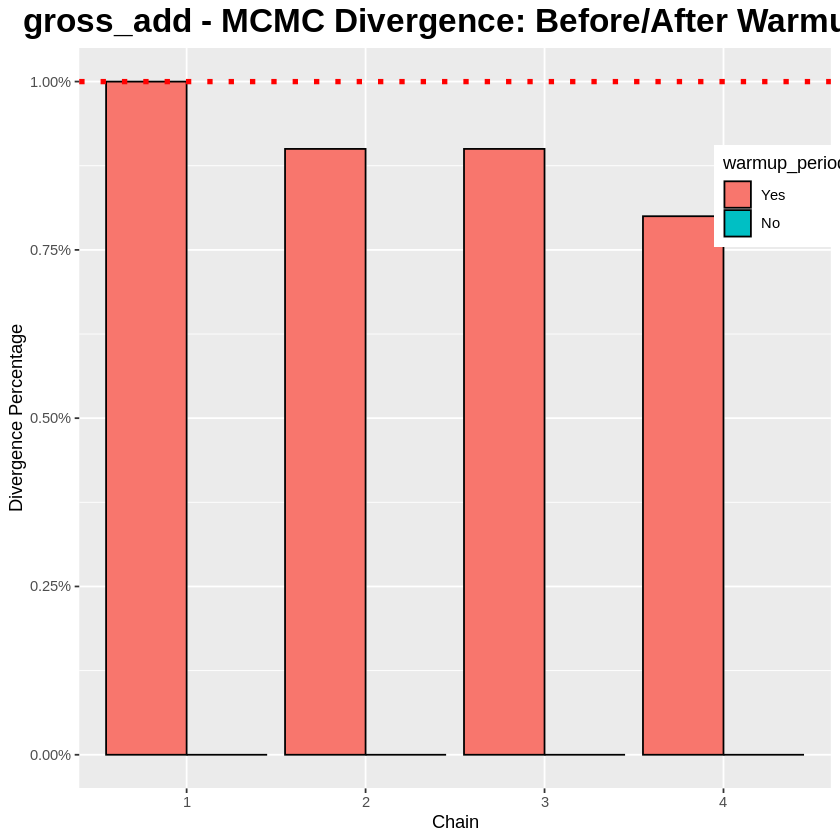

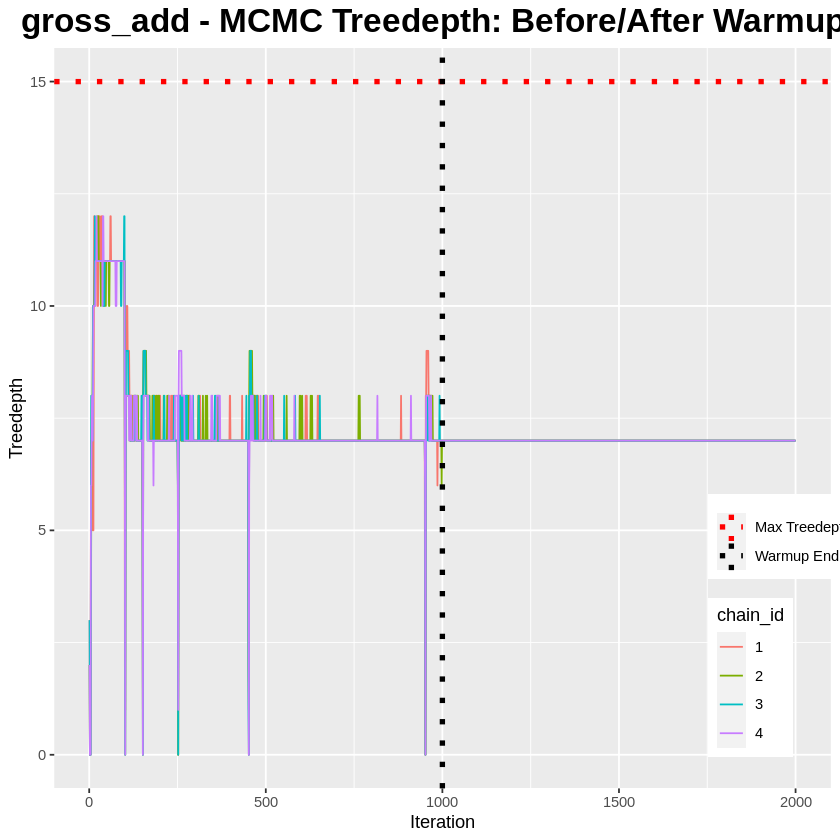

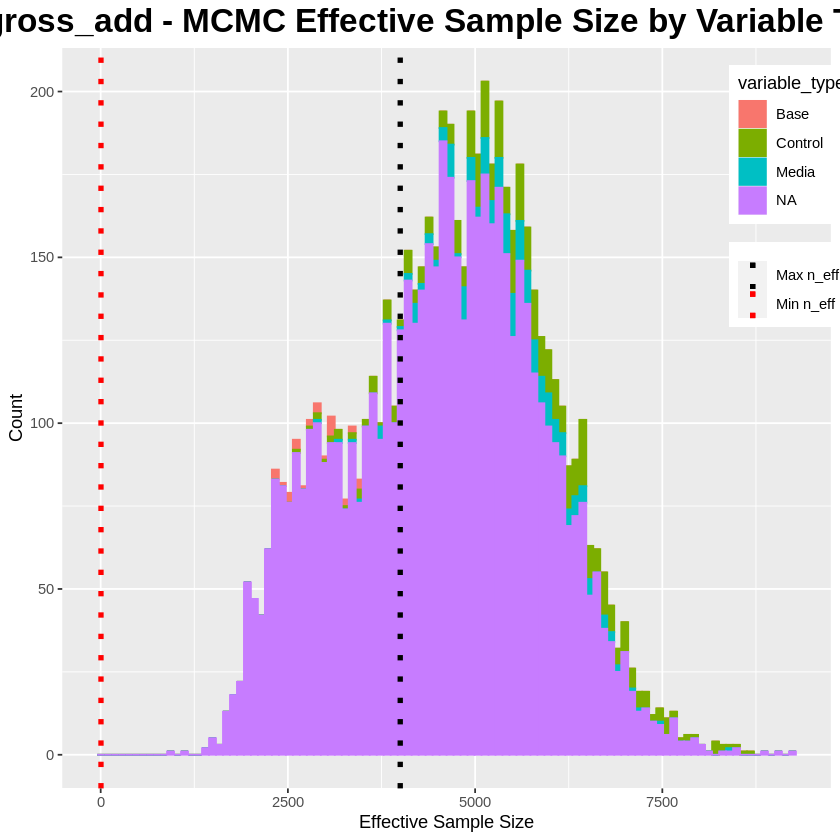

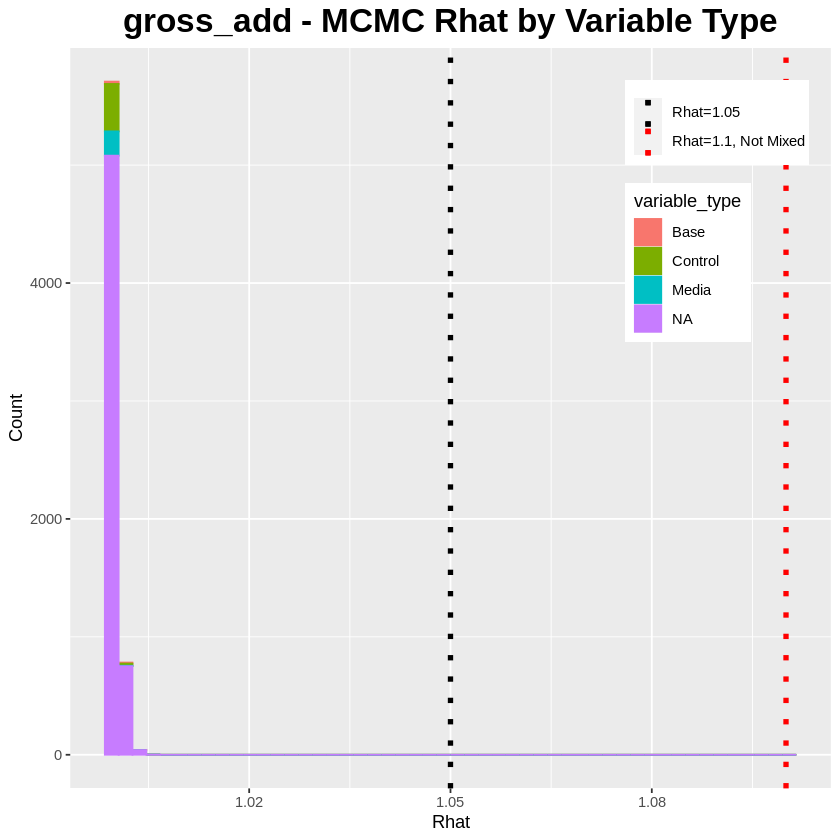

In [5]:
DIA_NP_22_00_C12$divergence
DIA_NP_22_00_C12$treedepth
DIA_NP_22_00_C12$n_eff
DIA_NP_22_00_C12$Rhat

## 4. Evaluate MMM

In [6]:
### No Pooling - 22 - C12 - 00
df_XyZ         = data_XyZ
pp_MMM_ls      = pp_MMM_email_cntrl
standata       = stan_data_NP_22_00_C12
stanfit        = fit_NP_22_00_C12_v2
media_positive = TRUE
pooling_type   = "no"

t0       = Sys.time()
EVA_NP_22_00_C12   = evaluate_MMM(df_XyZ         = df_XyZ,
                        pp_MMM_ls      = pp_MMM_ls,
                        standata       = standata,
                        stanfit        = stanfit,
                        media_positive = media_positive,
                        pooling_type_media   = pooling_type,
                        pooling_type_control = pooling_type)

t1       = Sys.time()
Runtime  = t1 - t0
print(Runtime)

# Time difference of 19.10957 mins

`summarise()` has grouped output by '.draw', 'group'. You can override using the `.groups` argument.

`summarise()` has grouped output by '.draw'. You can override using the `.groups` argument.

`summarise()` has grouped output by '.draw', 'group'. You can override using the `.groups` argument.

`summarise()` has grouped output by '.draw'. You can override using the `.groups` argument.

`summarise()` has grouped output by '.draw', 'group'. You can override using the `.groups` argument.

`summarise()` has grouped output by '.draw'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'group'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'group', 'variable_id', 'variable_name'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'group'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'group'. You can override using the `.groups` argument.

`summarise(

Time difference of 19.32027 mins


In [18]:
time_df <- data_XyZ %>%
ungroup() %>%
group_by(dma) %>%
mutate(time = row_number(period)) %>%
ungroup() %>%
select(period,time) %>%
distinct()

In [19]:
ts_data <- EVA_NP_22_00_C12$y_fitted_stat$ts %>%
filter(group%in%c('Optimum','Suddenlink','Altice')) %>%
left_join(time_df) %>%
select(period,everything())

Joining, by = "time"



In [20]:
save(ts_data,file = 'RData/Pred_vs_Actual_TS_data_full_data.RData')

### MCMC Objects

In [7]:
MCMC_objs <- EVA_NP_22_00_C12$MCMC_objs

In [8]:
MCMC_objs$eval_metrics <- EVA_NP_22_00_C12$y_fitted_stat$all

In [9]:
save(MCMC_objs,file = 'MCMC_objs/MCMC_objs_EVA_NP_22_00_C12_email_cntrl.rda')

### Model Fits

In [10]:
EVA_NP_22_00_C12$y_fitted_stat$all

group,metric,sample_type,N,Mean,Median,StdDev,Min,Max,Range,⋯,q005,q01,q015,q025,q075,q085,q09,q095,q0975,q099
<fct>,<fct>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Altice,r2,Train,4000,0.78739539,0.78973695,0.021767291,0.66484311,0.83890681,0.174063705,⋯,0.74865799,0.75800076,0.76570208,0.77435895,0.80257769,0.80926079,0.81288476,0.81916122,0.82378942,0.82775075
Altice,mape,Train,4000,6.54669000,6.51812996,0.426050996,5.26271957,8.52180587,3.259086293,⋯,5.90186695,6.02037268,6.10963472,6.25198020,6.81520207,6.98373981,7.10678252,7.29080502,7.46361591,7.65150041
Altice,rmse,Train,4000,102.09234619,101.56912889,5.476787917,87.25708595,127.15716658,39.900080623,⋯,94.08575620,95.45031180,96.44012957,98.20902356,105.66138657,107.77526578,109.32879115,111.65309196,114.11312211,116.55474414
Altice,nrmse,Train,4000,0.06650967,0.06616881,0.003567940,0.05684501,0.08283855,0.025993538,⋯,0.06129365,0.06218261,0.06282745,0.06397982,0.06883478,0.07021190,0.07122397,0.07273817,0.07434080,0.07593143
Altice,mae,Train,4000,77.76244316,77.38894429,4.844652572,62.64841459,99.51332233,36.864907744,⋯,70.42807413,71.78474541,72.74370865,74.36293131,80.92029839,82.82933356,84.08606581,86.24168708,88.20787732,90.10071124
Optimum,r2,Train,4000,0.74342964,0.74774644,0.032566831,0.56028445,0.81927943,0.258994979,⋯,0.68482090,0.69980054,0.71027145,0.72376186,0.76644280,0.77559127,0.78180055,0.78951407,0.79535040,0.80183147
Optimum,mape,Train,4000,8.42945349,8.37856121,0.695824664,6.32030759,11.78479690,5.464489311,⋯,7.38532514,7.58350068,7.70685050,7.93382499,8.87388991,9.13192358,9.35063438,9.65373316,9.90807994,10.22776056
Optimum,rmse,Train,4000,87.15719410,86.71606294,5.863750896,71.11727665,115.14812443,44.030847784,⋯,78.35323969,80.02709538,81.07764686,82.98446322,90.91320772,93.31250180,94.98831173,97.28982476,99.82574495,103.07294609
Optimum,nrmse,Train,4000,0.06194541,0.06163189,0.004167556,0.05054533,0.08183946,0.031294135,⋯,0.05568816,0.05687782,0.05762448,0.05897972,0.06461493,0.06632019,0.06751124,0.06914700,0.07094936,0.07325725


In [11]:
source('Packages/point_est.R')

In [12]:
point_metrics(EVA_NP_22_00_C12)

Note: Using an external vector in selections is ambiguous.
ℹ Use `all_of(stat)` instead of `stat` to silence this message.
ℹ See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>.
This message is displayed once per session.



group,point_rsq,point_MAPE,point_rsq2,r_sq_adj
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
Altice,0.8337464,5.387029,0.8358483,0.8148522
Optimum,0.8217983,6.429670,0.8221381,0.7993883
Suddenlink,0.7688995,6.499130,0.7748448,0.7460459


### Media Contribution

In [13]:
EVA_NP_22_00_C12$media_C_stat

group,variable_id,variable_name,N,Mean,Median,StdDev,Min,Max,Range,⋯,q005,q01,q015,q025,q075,q085,q09,q095,q0975,q099
<fct>,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Altice,0,media_contribution_y,4000,4.846451,4.716254,1.2767613,1.902058982,12.328516,10.426457,⋯,3.0196441,3.3080293,3.544898,3.881914,5.639444,6.196523,6.566356,7.121612,7.638238,8.296733
Altice,1,digital_spend,4000,21.062278,19.724164,9.8497020,2.950285624,59.251496,56.301211,⋯,7.8969419,9.6293641,10.934160,13.405988,27.074412,31.533478,34.911617,39.752521,43.883975,47.978019
Altice,2,DRTV_spend_w,4000,10.447444,9.263228,5.5437299,1.493803878,38.496725,37.002922,⋯,3.6188379,4.4522710,5.051730,6.201584,13.490885,16.137089,17.934301,21.422062,24.202041,27.578765
Altice,3,radio_spend_w,4000,5.965499,4.942894,3.9939687,0.555330497,29.507191,28.951860,⋯,1.4919770,1.9548341,2.324759,2.985127,7.902851,9.859783,11.273530,13.971691,16.284724,19.454008
Altice,4,social_spend,4000,7.584673,6.717251,3.8777300,0.982588771,27.919712,26.937123,⋯,2.9916443,3.5519269,3.984410,4.735474,9.579690,11.327603,12.816620,15.023266,17.623065,20.269887
Altice,5,dm_spend,4000,10.249910,8.778752,6.1267835,0.879308754,46.291850,45.412542,⋯,3.0963670,3.9428970,4.611999,5.797428,13.281365,16.154415,18.964196,22.755292,26.170755,30.253365
Altice,6,paid_search_spend,4000,10.639680,9.377186,6.2409717,0.977451466,41.303601,40.326149,⋯,3.0221375,3.9356216,4.593659,5.853711,14.062561,17.152893,19.170927,22.741213,25.664372,30.110634
Altice,7,cross_channel_imp,4000,34.050515,33.876652,13.1257165,6.886775500,73.121441,66.234666,⋯,13.6169456,16.6844824,19.120333,23.560649,43.535415,48.443425,51.876304,56.103511,60.124352,63.753093
Optimum,0,media_contribution_y,4000,5.175513,4.975340,1.8946483,0.898323734,16.557518,15.659194,⋯,2.4860111,2.8987619,3.250269,3.732588,6.369085,7.184179,7.733948,8.564688,9.312656,10.446117


### Control Contribution

In [14]:
EVA_NP_22_00_C12$control_C_stat

group,variable_id,variable_name,N,Mean,Median,StdDev,Min,Max,Range,⋯,q005,q01,q015,q025,q075,q085,q09,q095,q0975,q099
<fct>,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Altice,NA,control_contribution_y,4000,95.1622486,95.2924707,1.27675774,87.6802982331,98.1065856,10.4262873,⋯,92.88708112,93.44240529,93.81206172,94.36925086,96.1267232,96.4638486,96.7006700,96.989021,97.2004859,97.4124912
Altice,0,intercept,4000,29.2136712,29.4055632,6.33698902,8.8025233885,47.8024948,38.9999714,⋯,18.02521937,20.90746182,22.67882089,25.16903736,33.6085705,35.6732083,37.1271891,39.396484,41.0718558,42.6772867
Altice,1,seasonality_gross_add,4000,9.3722302,8.9979223,2.73293868,3.7417198205,22.7953362,19.0536164,⋯,5.72632939,6.15626477,6.52955653,7.21382937,11.1324075,12.2750584,13.1016426,14.312747,15.5405422,16.9637111
Altice,2,MA_4,4000,31.3078865,31.0664647,5.08862993,15.0218791684,52.1915143,37.1696351,⋯,23.25500184,24.97276975,26.12637795,27.74353333,34.6659212,36.6797157,37.9353043,39.909221,41.6851634,43.9664017
Altice,3,price_ARPU_fprint,4000,3.9040859,3.6511474,1.58884203,0.8822354741,11.2102366,10.3280012,⋯,1.83128150,2.07652016,2.29819897,2.67556414,4.8702323,5.6084021,6.0937108,6.887003,7.5209470,8.3968764
Altice,4,comp_index,4000,2.4956003,2.2468852,1.24360188,0.4948493606,8.1649781,7.6701288,⋯,0.96391844,1.12230738,1.23910187,1.51519767,3.2254443,3.8248612,4.2504349,4.903740,5.4665136,5.9919356
Altice,5,weather1,4000,9.0269786,8.7909111,3.47688896,2.4553928936,20.3298018,17.8744089,⋯,3.91627855,4.52459443,5.15193744,6.19327329,11.4616605,12.9084351,13.7940289,15.120322,16.2574508,17.5128140
Altice,6,weather5,4000,3.0980333,2.7177144,1.76524517,0.4493437239,11.9327340,11.4833903,⋯,0.95123847,1.15228750,1.33548583,1.70060596,4.1227154,4.9520026,5.5531881,6.518573,7.3669841,8.2890536
Altice,7,promotion,4000,1.1684564,1.1568662,0.30141239,0.3335307243,2.2682412,1.9347105,⋯,0.69173017,0.78127110,0.85235250,0.96289483,1.3658791,1.4798058,1.5594169,1.685945,1.7836104,1.9091523


### TS plots

In [ ]:
EVA_NP_22_00_C1$y_fitted_plot$ts_brand

In [ ]:
EVA_NP_22_00_C2$y_fitted_plot$ts_brand

In [ ]:
EVA_NP_22_10_C2$y_fitted_plot$ts_brand

In [ ]:
EVA_NP_22_00_C3$y_fitted_plot$ts_brand

### Save the Results for Optimization

In [16]:
NP_22_00_C12_email_cntrl_pop_para_stat = EVA_NP_22_00_C12$pop_para_stat$all
NP_22_00_C12_email_cntrl_geo_para_stat = EVA_NP_22_00_C12$geo_para_stat$all

In [17]:
save(NP_22_00_C12_email_cntrl_pop_para_stat,NP_22_00_C12_email_cntrl_geo_para_stat,file = 'Optimization_results/Optimizer_NP_22_00_C12_email_cntrl.RData')